In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.special as sp
from scipy.interpolate import interp1d
from mcfit import P2xi, xi2P

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [2]:
mattia_table = pd.read_csv(
    "/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/PS_doppler_doppler.txt", 
    delim_whitespace=True, names = ["K", "P(K)"]);
mattia_ks = np.array(mattia_table["K"][1:], dtype=float);
mattia_pks = np.array(mattia_table["P(K)"][1:], dtype=float);
mattia_interp_pk = interp1d(mattia_ks, mattia_pks);

In [3]:
mattia_xi_table = pd.read_csv(
    "/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/Doppler/", 
    delim_whitespace=True, names=["ss", "xis"]);
mattia_ss = np.array(mattia_xi_table["ss"][1:], dtype=float);
mattia_xis = np.array(mattia_xi_table["xis"][1:], dtype=float);
mattia_interp_xi = interp1d(mattia_ss, mattia_xis);

In [33]:
my_xi_table = pd.read_csv(
    "PSM_files/xi_auto_doppler_window_L0.txt", 
    delim_whitespace=True, names=["ss", "xis"], comment='#');
my_ss = np.array(my_xi_table["ss"][1:], dtype=float);
my_xis = np.array(my_xi_table["xis"][1:], dtype=float);
my_interp_xi = interp1d(my_ss, my_xis);

In [34]:
my_pk_table = pd.read_csv(
    "PSM_files/ps_auto_doppler_L0.txt", 
    delim_whitespace=True, names=["ks", "pks"], comment='#');
my_ks = np.array(my_pk_table["ks"][1:], dtype=float);
my_pks = np.array(my_pk_table["pks"][1:], dtype=float);
my_interp_pk = interp1d(my_ks, my_pks);

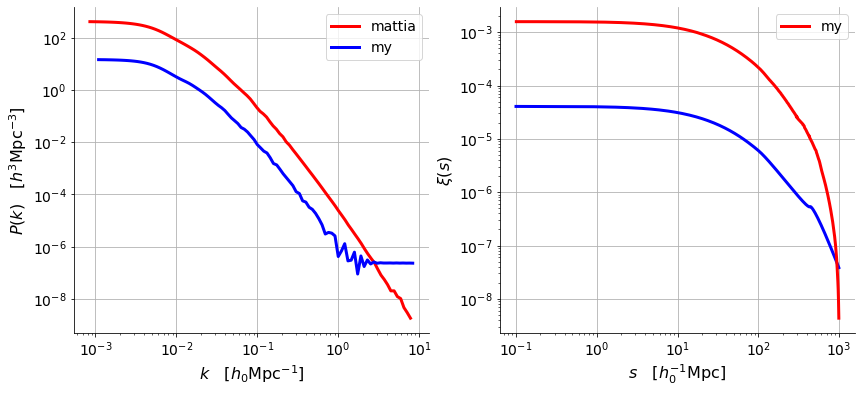

In [35]:
n1, n2 = 0, -1

fig, axs = plt.subplots(1,2,figsize=(14,6))

ax = axs[0]
ax.plot(mattia_ks[n1:n2], mattia_pks[n1:n2], "-r", 
        lw=3, label="mattia");
ax.plot(my_ks[n1:n2], my_pks[n1:n2], "-b", 
        lw=3, label="my");
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$P(k) \quad [h^3 \mathrm{Mpc}^{-3}]$")
ax.set_xlabel(r"$k \quad [h_0\mathrm{Mpc}^{-1}]$")
ax.legend()
ax.grid();

ax = axs[1]
ax.plot(mattia_ss[n1:n2], mattia_xis[n1:n2], "-b", lw=3);
ax.plot(my_ss[n1:n2], my_xis[n1:n2], "-r", 
        lw=3, label="my");
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\xi(s)$")
ax.set_xlabel(r"$s \quad [h_0^{-1}\mathrm{Mpc}]$")
ax.legend()
ax.grid();

mcfit convenction for $\xi$:

$$
    \xi_\ell^n(s) = i^\ell \int_{0}^{\infty} \frac{\mathrm{d} k}{2\pi^2} 
        P(k) \, k^{2+n} \, j_\ell(k r) 
$$

mcfit convenction for $P$:

$$
    P_\ell(k) = (-i)^\ell \int_0^\infty \mathrm{d}r \, 4\pi r^2 \,\xi_\ell(r) j_\ell(kr) 
$$

In [37]:
calc_ss, temp_xis = P2xi(mattia_ks, l=0, n=0, deriv=0)(mattia_pks);
calc_xis = temp_xis / (32 *np.pi**3)
interp_xi = interp1d(calc_ss, calc_xis);

In [70]:
calc_ks, temp_pks = xi2P(my_ss, q=1.0, lowring=True)(my_xis/(4 * np.pi**2), extrap=True);
calc_pks = temp_pks
interp_pk = interp1d(calc_ks, calc_pks);

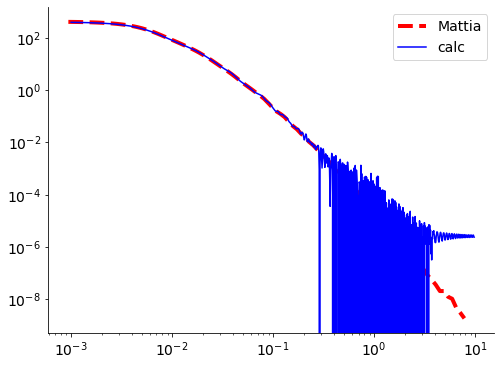

In [71]:
n1, n2 = 1, -1

#xs1, ys1 = mattia_ss[n1:n2], mattia_xis[n1:n2]
#xs2, ys2 = calc_ss[n1:n2], calc_xis[n1:n2]
#spline = mattia_interp_xi
#xs1, ys1 = mattia_ks[n1:n2], mattia_pks[n1:n2]
#xs2, ys2 = calc_ks[n1:n2], calc_pks[n1:n2]
#spline = mattia_interp_pk

xs1, ys1 = mattia_ks[n1:n2], mattia_pks[n1:n2]
xs2, ys2 = calc_ks[n1:n2], calc_pks[n1:n2]

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(xs1, ys1, color="red", ls="dashed", lw=4, label="Mattia")
ax.plot(xs2, ys2, "-b", ms=1, label="calc")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend();